In [2]:
# Imports
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

In [3]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')

last updated: 2018-08-22 
Git hash: b8389b62d61f5da9d0f1dbc553341dae7e776080


In [4]:
!ls $nbconfig.seurat_dir

biomarkers_res.0.4.tsv	metadata.tsv		    rep3_dispersion.tsv
biomarkers_res.0.6.tsv	normalized_read_counts.tsv  rep3_var_genes.tsv
biomarkers_res.1.tsv	raw_agg.parquet		    scaled.tsv
cca_aligned_cell.tsv	raw.tsv			    seurat.Robj
cca_cell.tsv		rep1_dispersion.tsv	    tsne.tsv
cca_gene_full.tsv	rep1_var_genes.tsv	    var_genes.txt
cca_gene.tsv		rep2_dispersion.tsv
clusters.tsv		rep2_var_genes.tsv


Text(0.5,0,'|median - mean|')

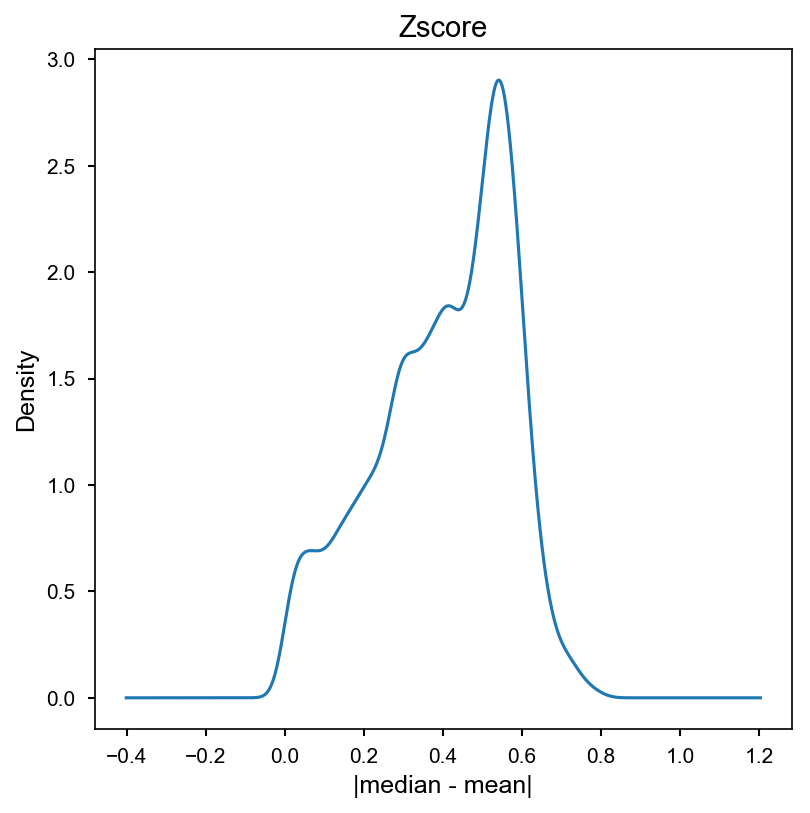

In [21]:
dat = pd.read_parquet('../output/scrnaseq-wf/tpm_zscore.parquet')

med = dat.median(axis=1)
avg = dat.mean(axis=1)
std = dat.std(axis=1)

assert (np.absolute(med - avg) > std).any() == False

ax = np.absolute(med - avg).plot.kde()
ax.set_title('Zscore')
ax.set_xlabel('|median - mean|')

Text(0.5,0,'|median - mean|')

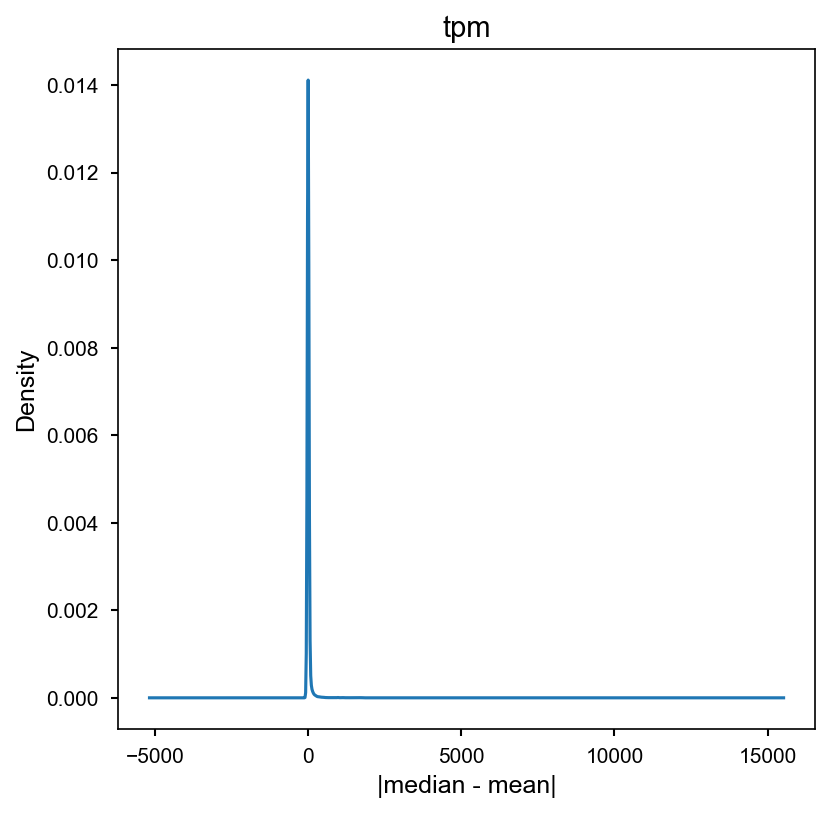

In [25]:
dat = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet')

med = dat.median(axis=1)
avg = dat.mean(axis=1)
std = dat.std(axis=1)

assert (np.absolute(med - avg) > std).any() == False

ax = np.absolute(med - avg).plot.kde()
ax.set_title('tpm')
ax.set_xlabel('|median - mean|')

Text(0.5,0,'|median - mean|')

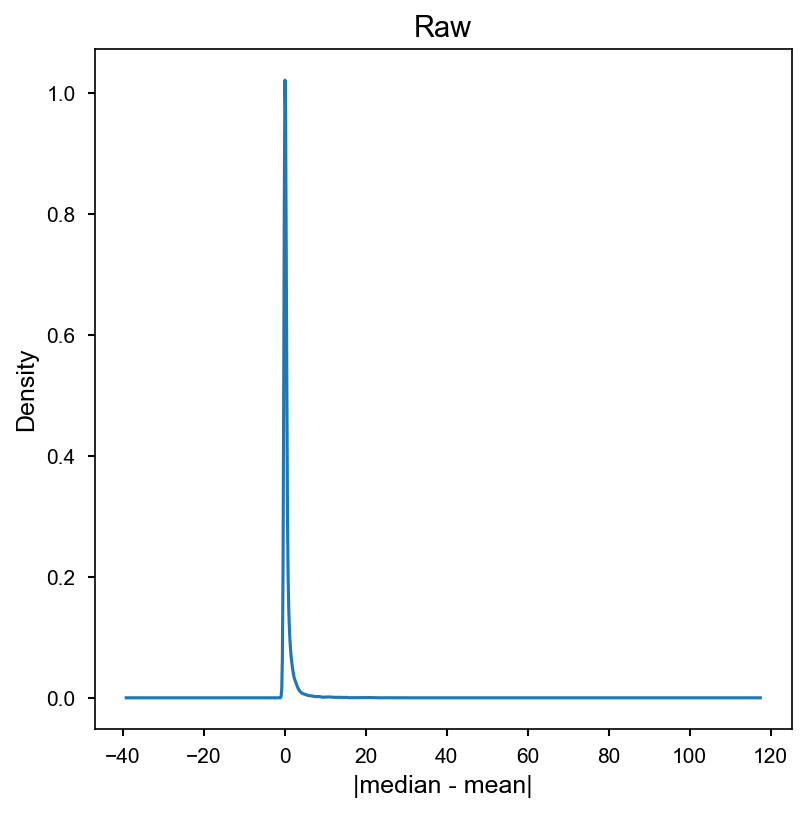

In [23]:
dat = pd.read_parquet('../output/scrnaseq-wf/raw.parquet')

med = dat.median(axis=1)
avg = dat.mean(axis=1)
std = dat.std(axis=1)

assert (np.absolute(med - avg) > std).any() == False

ax = np.absolute(med - avg).plot.kde()
ax.set_title('Raw')
ax.set_xlabel('|median - mean|')

In [ ]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [58]:
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

In [64]:
dat.mad(axis=1).head()

FBgn
FBgn0031081     0.078330
FBgn0031085    55.753831
FBgn0040784    54.764902
FBgn0031086     0.034112
FBgn0031082    10.200460
dtype: float64

In [65]:
from statsmodels.robust.scale import mad

In [69]:
dat.subtract(dat.median(axis=1), axis=0).div(dat.apply(mad, axis=1), axis=0)

,Spermatogonia (6),Early 1º Spermatocytes (3),Mid 1º Spermatocytes (2),Unknown (11),Late 1º Spermatocytes (0),Early Cyst Cells (5),Mid Cyst Cells (1),Late Cyst Cells (4),Unknown (9),Unknown (10),Terminal Epithelium (7),Pigment Cells (8)
FBgn,,,,,,,,,,,,
FBgn0031081,-0.666283,0.123544,-0.560095,-0.547138,-0.123544,0.294332,1.707940,7.201856,4.946472,5.361899,-0.682697,-0.981313
FBgn0031085,-0.648186,4.800194,8.124403,8.709609,6.084589,-0.700794,0.249303,-0.249303,-0.412994,0.777239,-0.606741,-0.445168
FBgn0040784,3.806716,6.779020,2.920158,2.759363,4.143941,-0.670159,0.002802,-0.490420,-0.561750,-0.002802,-0.678821,-0.622736
FBgn0031086,inf,inf,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN
FBgn0031082,-0.634226,4.115021,6.710158,7.947974,5.161604,-0.714754,0.281054,-0.281054,-0.531768,1.124538,-0.574017,-0.544503
FBgn0031080,-0.031428,-0.387997,-0.209452,-0.563081,-0.785898,4.645327,17.615634,25.005421,22.875023,12.235357,0.031428,-0.353422
FBgn0053217,2.636727,3.499289,-0.703351,-1.508578,0.782775,0.197133,-0.336445,0.018855,-0.131139,-0.654466,0.694514,-0.018855
FBgn0052350,1.942352,-0.154646,-0.781378,-0.676635,-0.672345,1.374944,-0.240542,0.632145,0.154646,-0.558402,4.353930,2.930060
FBgn0024733,1.008012,-0.631613,-1.120773,-1.090513,-0.892012,0.717367,-0.111528,0.082054,0.369076,-0.082054,0.586197,1.100020


In [90]:
_dat = raw.loc['FBgn0031086', :]

In [91]:
_dat

Spermatogonia (6)             11
Early 1º Spermatocytes (3)    11
Mid 1º Spermatocytes (2)       1
Unknown (11)                   1
Late 1º Spermatocytes (0)      0
Early Cyst Cells (5)           2
Mid Cyst Cells (1)             0
Late Cyst Cells (4)            0
Unknown (9)                    0
Unknown (10)                   0
Terminal Epithelium (7)        0
Pigment Cells (8)              0
Name: FBgn0031086, dtype: int64

In [92]:
_dat.subtract(_dat.median()).div(mad(_dat))

Spermatogonia (6)             inf
Early 1º Spermatocytes (3)    inf
Mid 1º Spermatocytes (2)      inf
Unknown (11)                  inf
Late 1º Spermatocytes (0)     NaN
Early Cyst Cells (5)          inf
Mid Cyst Cells (1)            NaN
Late Cyst Cells (4)           NaN
Unknown (9)                   NaN
Unknown (10)                  NaN
Terminal Epithelium (7)       NaN
Pigment Cells (8)             NaN
Name: FBgn0031086, dtype: float64

In [93]:
_dat.subtract(_dat.mean()).div(_dat.std())

Spermatogonia (6)             2.116156
Early 1º Spermatocytes (3)    2.116156
Mid 1º Spermatocytes (2)     -0.279492
Unknown (11)                 -0.279492
Late 1º Spermatocytes (0)    -0.519057
Early Cyst Cells (5)         -0.039927
Mid Cyst Cells (1)           -0.519057
Late Cyst Cells (4)          -0.519057
Unknown (9)                  -0.519057
Unknown (10)                 -0.519057
Terminal Epithelium (7)      -0.519057
Pigment Cells (8)            -0.519057
Name: FBgn0031086, dtype: float64

In [88]:
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet')

,Spermatogonia (6),Early 1º Spermatocytes (3),Mid 1º Spermatocytes (2),Unknown (11),Late 1º Spermatocytes (0),Early Cyst Cells (5),Mid Cyst Cells (1),Late Cyst Cells (4),Unknown (9),Unknown (10),Terminal Epithelium (7),Pigment Cells (8)
FBgn,,,,,,,,,,,,
FBgn0031081,4,19,4,8,2,9,10,33,12,4,1,0
FBgn0031085,890,14214,12232,25231,2343,443,724,506,208,169,254,311
FBgn0040784,4736,10270,2907,5417,929,249,320,197,88,54,116,123
FBgn0031086,11,11,1,1,0,2,0,0,0,0,0,0
FBgn0031082,222,2508,2051,4596,406,108,157,109,41,41,64,63
FBgn0031080,7,5,4,3,0,28,50,76,35,6,2,1
FBgn0053217,793,1234,251,327,99,255,113,138,66,17,139,107
FBgn0052350,207,91,19,47,6,94,18,38,14,2,97,68
FBgn0024733,77338,32800,6260,13569,2898,37741,12027,15035,9030,2087,16793,20017


In [33]:
med = dat.median(axis=1)

In [54]:
MAD = np.abs(dat.subtract(med, axis=0)).median(axis=1)

In [61]:
MAD.head()

FBgn
FBgn0031081     0.022872
FBgn0031085    11.777399
FBgn0040784    16.834398
FBgn0031086     0.000000
FBgn0031082     2.489573
dtype: float64

In [57]:
0.6745 * (dat.subtract(med, axis=0)).div(MAD, axis=0)

,Spermatogonia (6),Early 1º Spermatocytes (3),Mid 1º Spermatocytes (2),Unknown (11),Late 1º Spermatocytes (0),Early Cyst Cells (5),Mid Cyst Cells (1),Late Cyst Cells (4),Unknown (9),Unknown (10),Terminal Epithelium (7),Pigment Cells (8)
FBgn,,,,,,,,,,,,
FBgn0031081,-0.666293,0.123546,-0.560103,-0.547146,-0.123546,0.294337,1.707966,7.201965,4.946548,5.361981,-0.682707,-0.981328
FBgn0031085,-0.648196,4.800267,8.124526,8.709741,6.084682,-0.700804,0.249307,-0.249307,-0.413001,0.777250,-0.606750,-0.445175
FBgn0040784,3.806774,6.779123,2.920202,2.759405,4.144004,-0.670169,0.002802,-0.490427,-0.561758,-0.002802,-0.678831,-0.622745
FBgn0031086,inf,inf,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN
FBgn0031082,-0.634235,4.115083,6.710260,7.948095,5.161683,-0.714765,0.281059,-0.281059,-0.531776,1.124555,-0.574025,-0.544512
FBgn0031080,-0.031428,-0.388003,-0.209455,-0.563090,-0.785910,4.645397,17.615901,25.005801,22.875370,12.235543,0.031428,-0.353427
FBgn0053217,2.636767,3.499342,-0.703362,-1.508601,0.782787,0.197136,-0.336450,0.018855,-0.131141,-0.654476,0.694524,-0.018855
FBgn0052350,1.942381,-0.154649,-0.781390,-0.676645,-0.672355,1.374965,-0.240546,0.632154,0.154649,-0.558411,4.353996,2.930105
FBgn0024733,1.008027,-0.631622,-1.120790,-1.090530,-0.892025,0.717378,-0.111530,0.082055,0.369081,-0.082055,0.586205,1.100036


In [45]:
MAD = np.absolute(dat.subtract(med, axis=0)).median(axis=1)

In [47]:
dat.subtract(med, axis=0).div(MAD, axis=0)

,Spermatogonia (6),Early 1º Spermatocytes (3),Mid 1º Spermatocytes (2),Unknown (11),Late 1º Spermatocytes (0),Early Cyst Cells (5),Mid Cyst Cells (1),Late Cyst Cells (4),Unknown (9),Unknown (10),Terminal Epithelium (7),Pigment Cells (8)
FBgn,,,,,,,,,,,,
FBgn0031081,-0.987832,0.183167,-0.830398,-0.811187,-0.183167,0.436378,2.532195,10.677488,7.333651,7.949564,-1.012168,-1.454896
FBgn0031085,-0.961002,7.116778,12.045258,12.912886,9.021026,-1.038998,0.369617,-0.369617,-0.612306,1.152336,-0.899555,-0.660007
FBgn0040784,5.643845,10.050590,4.329432,4.091038,6.143817,-0.993579,0.004154,-0.727097,-0.832852,-0.004154,-1.006421,-0.923269
FBgn0031086,inf,inf,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN
FBgn0031082,-0.940304,6.100939,9.948495,11.783684,7.652606,-1.059696,0.416692,-0.416692,-0.788400,1.667242,-0.851038,-0.807282
FBgn0031080,-0.046595,-0.575246,-0.310534,-0.834825,-1.165175,6.887171,26.116977,37.073092,33.914559,18.140168,0.046595,-0.523984
FBgn0053217,3.909217,5.188053,-1.042790,-2.236621,1.160544,0.292269,-0.498815,0.027954,-0.194427,-0.970312,1.029688,-0.027954
FBgn0052350,2.879735,-0.229279,-1.158472,-1.003180,-0.996820,2.038495,-0.356629,0.937219,0.229279,-0.827888,6.455146,4.344114
FBgn0024733,1.494480,-0.936430,-1.661661,-1.616798,-1.322499,1.063570,-0.165352,0.121653,0.547193,-0.121653,0.869096,1.630891
